<a href="https://colab.research.google.com/github/Mezgo/Quake-Alert/blob/Codigo/etl/EDA_ETL_chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importamos las librerias
import requests                     # hacer request a la pagina
import pandas as pd                 # dataframes
import matplotlib.pyplot as plt     # plots
import seaborn as sns               # plots
import datetime                     # formato de fechas
              

In [ ]:
# definir la URL de la API de la USGS para obtener datos de sismos
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

# definir los parámetros de la consulta
params = {
    'format': 'geojson',
    'starttime': '2023-01-01',
    'endtime': '2023-05-11',
    'minmagnitude': '1',
    'maxlatitude': '-17.5',
    'minlatitude': '-56.0',
    'maxlongitude': '-66.0',
    'minlongitude': '-81.0',
}

# hacer la consulta a la API
response = requests.get(url, params=params)

# cargar los datos en un DataFrame de Pandas
data = response.json()['features']
df = pd.json_normalize(data)

# seleccionar solo las columnas de interés
cols = ['properties.mag', 'properties.place', 'geometry.coordinates', 'properties.time']
df = df[cols]

# renombrar las columnas
df.columns = ['magnitud', 'lugar', 'coordenadas', 'fecha']

# imprimir el DataFrame resultante
print(df)


In [31]:
df.head()

,magnitud,lugar,coordenadas,fecha
0,4.1,"45 km WNW of Abra Pampa, Argentina","[-66.075, -22.5145, 295.673]",1683623754342
1,4.4,"56 km WSW of Atocha, Bolivia","[-66.744, -21.0683, 236.151]",1683593777052
2,4.6,"Near the coast of Atacama, Chile","[-71.3262, -28.6913, 37.684]",1683513242863
3,4.4,"Jujuy, Argentina","[-66.8884, -23.3425, 235.3]",1683444623676
4,5.2,"Near the coast of Antofagasta, Chile","[-70.5066, -25.3571, 40.047]",1683440940792


la columna coodenada sus valores significan:

El primer valor, -66.075, es la longitud en grados decimales. En este caso, indica que el sismo ocurrió al oeste del meridiano de Greenwich, en algún punto entre Chile y Argentina.
El segundo valor, -22.5145, es la latitud en grados decimales. En este caso, indica que el sismo ocurrió al sur del ecuador, en algún punto al sur de Chile.
El tercer valor, 295.673, es la profundidad en kilómetros. Indica la distancia vertical desde la superficie de la tierra hasta el punto donde se originó el sismo

In [32]:
#aca separamos la columna coordenadas en latitud, longitud y profundidad
df[['longitud', 'latitud', 'profundidad']] = pd.DataFrame(df['coordenadas'].tolist(), index=df.index)

In [33]:
df.head(2)

,magnitud,lugar,coordenadas,fecha,longitud,latitud,profundidad
0,4.1,"45 km WNW of Abra Pampa, Argentina","[-66.075, -22.5145, 295.673]",1683623754342,-66.075,-22.5145,295.673
1,4.4,"56 km WSW of Atocha, Bolivia","[-66.744, -21.0683, 236.151]",1683593777052,-66.744,-21.0683,236.151


In [34]:
# Eliminar la columna original de "coordenadas"
df.drop(columns=['coordenadas'], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   magnitud     292 non-null    float64
 1   lugar        281 non-null    object 
 2   fecha        292 non-null    int64  
 3   longitud     292 non-null    float64
 4   latitud      292 non-null    float64
 5   profundidad  292 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 13.8+ KB


In [36]:
#transformamos fecha en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], unit='ms')

In [37]:
df.head(2)

,magnitud,lugar,fecha,longitud,latitud,profundidad
0,4.1,"45 km WNW of Abra Pampa, Argentina",2023-05-09 09:15:54.342,-66.075,-22.5145,295.673
1,4.4,"56 km WSW of Atocha, Bolivia",2023-05-09 00:56:17.052,-66.744,-21.0683,236.151


In [38]:
df.describe(exclude='number')

<ipython-input-38-38d271b0689f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude='number')


,lugar,fecha
count,281,292
unique,244,292
top,"Near the coast of Coquimbo, Chile",2023-05-09 09:15:54.342000
freq,7,1
first,NaN,2023-01-01 12:18:59.423000
last,NaN,2023-05-09 09:15:54.342000


In [39]:
df['fecha_local'] = df['fecha'].dt.date
df['hora_local'] = df['fecha'].dt.time

In [40]:
df.head(2)

,magnitud,lugar,fecha,longitud,latitud,profundidad,fecha_local,hora_local
0,4.1,"45 km WNW of Abra Pampa, Argentina",2023-05-09 09:15:54.342,-66.075,-22.5145,295.673,2023-05-09,09:15:54.342000
1,4.4,"56 km WSW of Atocha, Bolivia",2023-05-09 00:56:17.052,-66.744,-21.0683,236.151,2023-05-09,00:56:17.052000


In [ ]:
#son lugares donde ocurrieron los sismos aunque estan fuera de chile se sintieron en chile
df['lugar'].unique()

In [41]:
#borramos fecha
df.drop(columns=['fecha'], inplace=True)

In [42]:
#aca solo dejamos horas y minutos

df['hora_local'] = df['hora_local'].apply(lambda x: x.strftime('%H:%M'))

In [43]:
df.head(2)

,magnitud,lugar,longitud,latitud,profundidad,fecha_local,hora_local
0,4.1,"45 km WNW of Abra Pampa, Argentina",-66.075,-22.5145,295.673,2023-05-09,09:15
1,4.4,"56 km WSW of Atocha, Bolivia",-66.744,-21.0683,236.151,2023-05-09,00:56


In [44]:
df.isnull().sum()

magnitud        0
lugar          11
longitud        0
latitud         0
profundidad     0
fecha_local     0
hora_local      0
dtype: int64

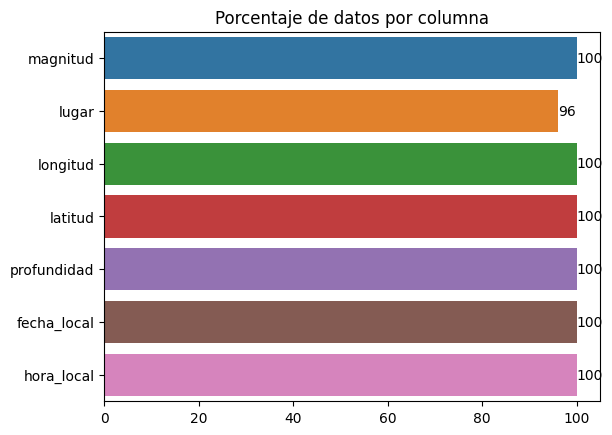

In [45]:
ax = sns.barplot(x = (round(df.notnull().sum()*100/df.shape[0])).values, y = df.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna');

In [46]:
# Verificar si hay filas duplicadas
if df.duplicated().any():
    print("Hay filas duplicadas")
else:
    print("No hay filas duplicadas")

No hay filas duplicadas


In [24]:
df

,magnitud,lugar,longitud,latitud,profundidad,fecha_local,hora_local
0,4.1,"45 km WNW of Abra Pampa, Argentina",-66.0750,-22.5145,295.673,2023-05-09,09:15
1,4.4,"56 km WSW of Atocha, Bolivia",-66.7440,-21.0683,236.151,2023-05-09,00:56
2,4.6,"Near the coast of Atacama, Chile",-71.3262,-28.6913,37.684,2023-05-08,02:34
3,4.4,"Jujuy, Argentina",-66.8884,-23.3425,235.300,2023-05-07,07:30
4,5.2,"Near the coast of Antofagasta, Chile",-70.5066,-25.3571,40.047,2023-05-07,06:29
...,...,...,...,...,...,...,...
287,4.5,"25 km ENE of San Martín, Argentina",-68.2466,-31.3613,105.312,2023-01-02,11:24
288,4.5,"62 km W of San Antonio de los Cobres, Argentina",-66.9233,-24.1203,195.266,2023-01-02,06:45
289,4.4,"Potosi, Bolivia",-67.2105,-21.3126,201.911,2023-01-01,21:32
290,4.1,"136 km N of Calama, Chile",-68.9621,-21.2221,90.462,2023-01-01,13:27


In [47]:
df.drop(columns=['lugar'], inplace=True)

In [48]:
df.head(2)

,magnitud,longitud,latitud,profundidad,fecha_local,hora_local
0,4.1,-66.075,-22.5145,295.673,2023-05-09,09:15
1,4.4,-66.744,-21.0683,236.151,2023-05-09,00:56


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   magnitud     292 non-null    float64
 1   longitud     292 non-null    float64
 2   latitud      292 non-null    float64
 3   profundidad  292 non-null    float64
 4   fecha_local  292 non-null    object 
 5   hora_local   292 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.8+ KB


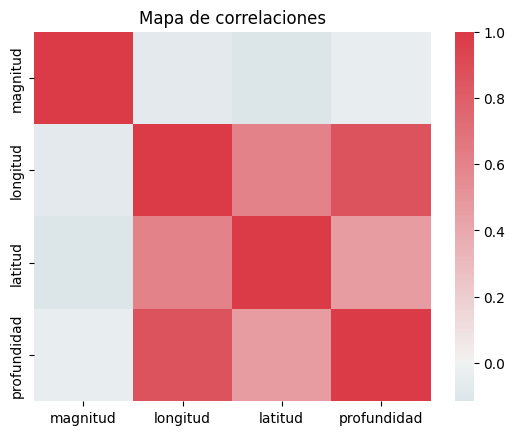

In [51]:


# Generar mapa de correlaciones con paleta de colores personalizada
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(numeric_only=True), cmap=cmap, center=0)
plt.title('Mapa de correlaciones')
plt.show()


Correlación positiva fuerte: Los valores cercanos a 1 sugieren una relación positiva fuerte entre las variables. Esto implica que cuando una variable aumenta, es probable que la otra variable también aumente.

Correlación negativa fuerte: Los valores cercanos a -1 sugieren una relación negativa fuerte entre las variables. Esto implica que cuando una variable aumenta, es probable que la otra variable disminuya.

La conclusión de este mapa de correlación es que hay una gran relación entre profundidad y longitud, y en menos insidencia latidud y longitud

In [55]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.4 MB/s eta 0:00:00


In [56]:
# Graficar en mapa con latitud y longitud
import geopandas as gpd                     
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.colors as colors


sns.set_style("darkgrid")

In [58]:
df.columns


Index(['magnitud', 'longitud', 'latitud', 'profundidad', 'fecha_local',
       'hora_local'],
      dtype='object')

<ipython-input-59-7923a63429a5>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


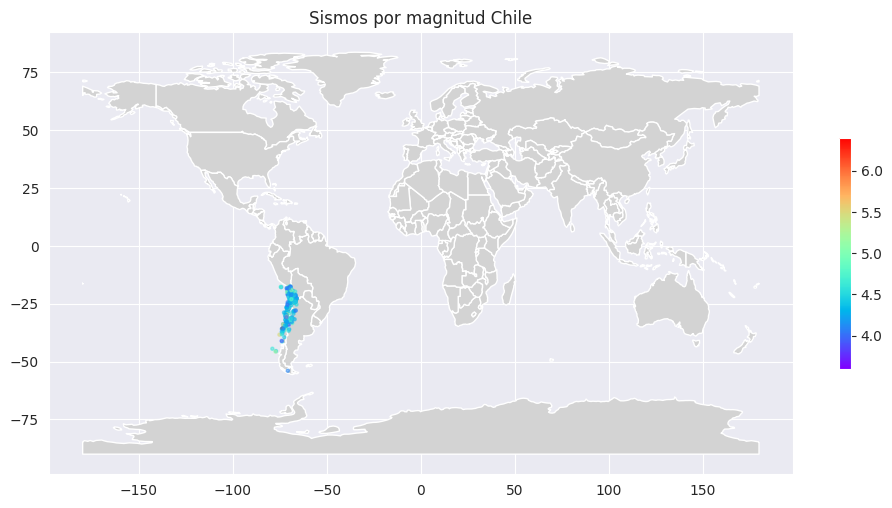

In [59]:
# https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
# Escogemos el mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Creamos el objeto geodataframe
crs = 'EPSG:4326'
geometry = [Point(xy) for xy in zip(df['longitud'], df['latitud'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

# por magnitud
fig, ax = plt.subplots(figsize = (12,10))

world.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')

geo_df.plot(column = 'magnitud', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 5, alpha=0.5)
            
ax.set_title('Sismos por magnitud Chile');

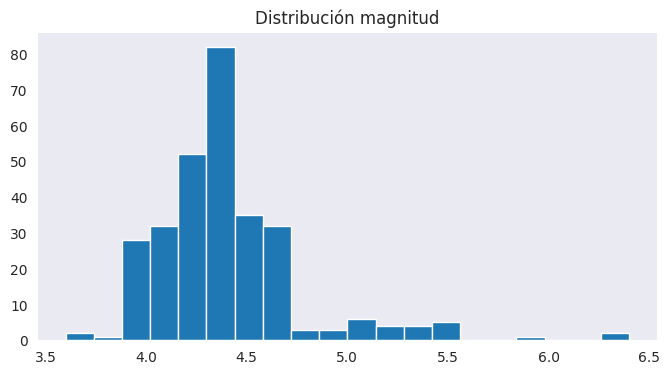

In [61]:
plt.figure(figsize=(8, 4))
plt.hist(df['magnitud'], bins=20)
plt.title('Distribución magnitud')
plt.grid()
plt.show()

 La mayoría de los sismos registrados tienen una magnitud que oscila entre 4 y 4.6. Esto sugiere que los sismos más comunes en la región o período de estudio son de intensidad moderada.
Este gráfico nos muestra que la mayoría de los sismos que ocurren en Chile son 4.4 grados en escala de Ritcher

In [62]:
df.to_json('chile.json')


In [63]:
from google.colab import files

files.download('chile.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>